# Module H: Section 22.1-22.3
## Ordinary Differential Equations: Initial Value Problems

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from functools import partial
plt.style.use('seaborn-poster')

1. The logistics equation is a simple differential equation model that can be used to relate the change in population dPdt to the current population, P, given a growth rate, r, and a carrying capacity, K. The logistics equation can be expressed by:
$$
dP/dt=rP(1−P/K)
$$
Write a function my_logistics_eq(t,P,r,K) that represents the logistics equation with a return of dP. Note that this format allows my_logistics_eq to be used as an input argument to solve_ivp. You may assume that the arguments dP, t, P, r, and K are all scalars, and dP is the value dPdt given r, P, and K. Note that the input argument, t, is obligatory if my_logistics_eq is to be used as an input argument to solve_ivp, even though it is part of the differential equation.

In [2]:
def my_logisitcs_eq(t, P, r, K):
    dP = r * P * (1 - P / K)
    return dP

_dP = my_logisitcs_eq(0, 10, 1.1, 15)
print(_dP)

3.666666666666667


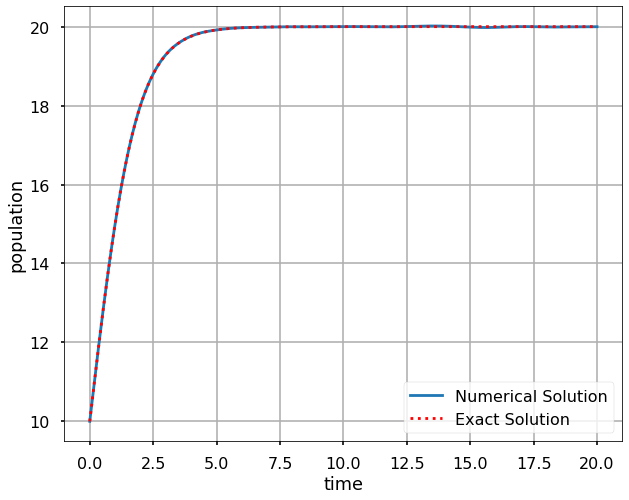

In [3]:
_t0 = 0
_tf = 20
_P0 = 10
_r = 1.1
_K = 20
_t = np.linspace(0, 20, 2001)

_f = partial(my_logisitcs_eq, r=_r, K=_K)
sol=solve_ivp(_f,[_t0,_tf],[_P0],t_eval=_t)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(_t, _K*_P0*np.exp(_r*_t) / (_K+_P0*(np.exp(_r*_t)-1)), 'r:')
plt.xlabel('time')
plt.ylabel('population')

plt.legend(['Numerical Solution', 'Exact Solution'])
plt.grid(True)
plt.show()

The Lorenz attractor is a system of ordinary differential equations that was originally developed to model convection currents in the atmosphere. The Lorenz equations can be written as: 

$dx/dt=σ(y−x)$

$dy/dt=x(ρ−z)−y$

$dz/dt=xy−βz$

where x, y, and z represent position in three dimensions and σ,ρ, and β are scalar parameters of the system. You can read more about the Lorenz attractor on Wikipedia: Lorenz System.

Write a function my_lorenz(t,S,sigma,rho,beta), where t is a scalar denoting time, S is a (3,) array denoting the position (x,y,z), and sigma, rho, and beta are strictly positive scalars representing σ,ρ, and β. The output argument dS should be the same size as S.

In [4]:
def my_lorenz(t, S, sigma, rho, beta):
    dS = np.zeros(3)

    dS[0] = sigma * (S[1] - S[0])
    dS[1] = S[0] * (rho - S[2]) - S[1]
    dS[2] = S[0] * S[1] - beta * S[2]

    return dS

_s = np.array([1, 2, 3])
_dS = my_lorenz(0, _s, 10, 28, 8/3)

print(_dS)

[10. 23. -6.]


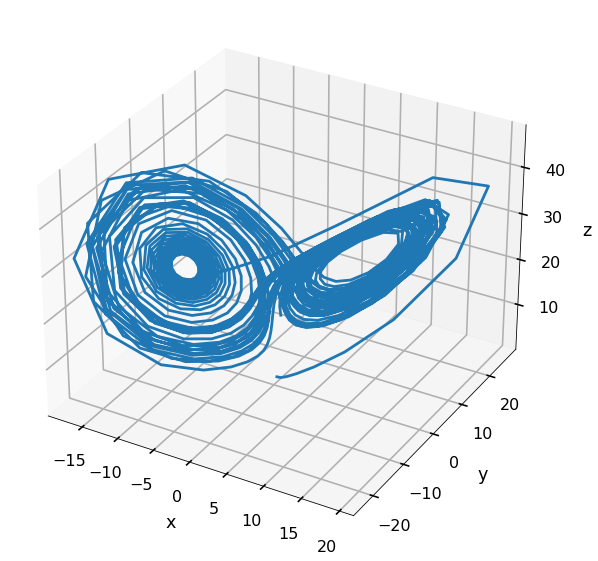

In [5]:
def my_lorenz_solver(t_span, s0, sigma, rho, beta):
    """
    Solve the Lorenz equations

    :param t_span: [t0, tf]
    :param s0: [x0, y0, z0]
    :param sigma: σ
    :param rho: ρ
    :param beta: β
    :return: [T, X, Y, Z]
    """

    F = partial(my_lorenz, sigma=sigma, rho=rho, beta=beta)

    # Initialize the solver
    solver = solve_ivp(F, t_span, s0, t_eval=np.linspace(t_span[0], t_span[1], 1001))

    # Get the solution
    _out = solver.y

    return [solver.t, _out[0], _out[1], _out[2]]

_sigma = 10
_rho = 28
_beta = 8/3
_t0 = 0
_tf = 50
_s0 = np.array([0, 1, 1.05])

[_T, _X, _Y, _Z] = my_lorenz_solver([_t0, _tf], _s0, _sigma, _rho, _beta)

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.plot3D(_X, _Y, _Z)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()

3. Consider the following model of a mass-spring-damper (MSD) system in one dimension. In this figure m denotes the mass of the block, c is called the damping coefficient, and k is the spring stiffness. A damper is a mechanism that dissipates energy in the system by resisting velocity. The MSD system is a simplistic model of several engineering applications such as shock observers and structural systems.
The relationship between acceleration, velocity, and displacement can be expressed by the following mass-spring-damper (MSD) differential equation:
mx¨+cx˙+kx=0
which can be rewritten: $x¨=−(cx˙+kx)m$
Let the state of the system be denoted by the vector S=[x;v] where x is the displacement of the mass from its resting configuration and v is its velocity. Rewrite the MSD equation as a first-order differential equation in terms of the state, S. In other words, rewrite the MSD equation as dS/dt=f(t,S).
Write a function my_msd(t,S,m,c,k), where t is a scalar denoting time, S is a (2,) vector denoting the state of the MSD system, and m, c, and k are the mass, damping, and stiffness coefficients of the MSD equation, respectively.

In [6]:
def my_msd(t, S, m, c, k):
    """
    Solve the MSD equation

    :param t: time
    :param S: state of the MSD system [x;v] = [displacement; velocity]
    :param m: mass
    :param c: damping coefficient
    :param k: spring constant
    :return: dS
    """
    # Initialize the output vector ds
    ds = np.zeros(2)

    ds[0] = S[1]
    ds[1] = -(c*S[1] + k*S[0]) / m

    return ds

In [7]:
# Test the function
print(my_msd(0, [1, -1], 10, 1, 100))

[-1.  -9.9]


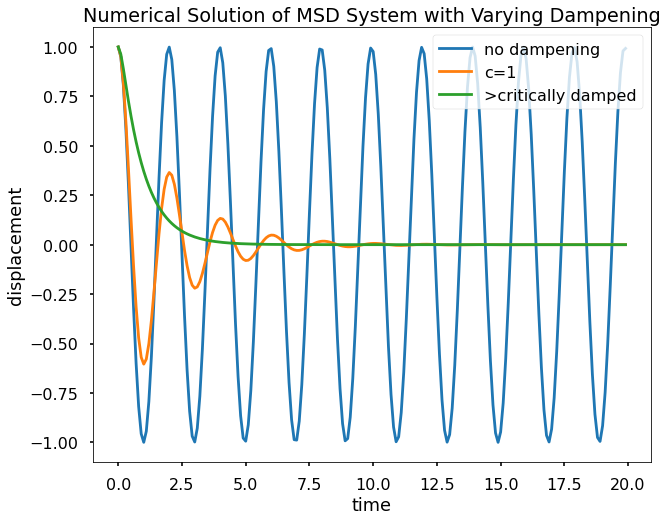

In [8]:
m = 1
k = 10
f = partial(my_msd, m=m, c=0, k=k)
t_e = np.arange(0, 20, 0.1)
sol_1=solve_ivp(f,[0,20],[1,0],t_eval=t_e)

f = partial(my_msd, m=m, c=1, k=k)
sol_2=solve_ivp(f,[0,20],[1,0],t_eval=t_e)

f = partial(my_msd, m=m, c=10, k=k)
sol_3=solve_ivp(f,[0,20],[1,0],t_eval=t_e)

plt.figure(figsize = (10, 8))
plt.plot(sol_1.t, sol_1.y[0])
plt.plot(sol_2.t, sol_2.y[0])
plt.plot(sol_3.t, sol_3.y[0])
plt.title('Numerical Solution of MSD System with Varying Dampening')
plt.xlabel('time')
plt.ylabel('displacement')
plt.legend(['no dampening', 'c=1', '>critically damped'], loc=1)

plt.show()

4. Write a function my_forward_euler(ds,t_span,s0), where ds is a function object, f(t,s), describing a first-order differential equation, t_span is an array of times for which numerical solutions of the differential equation are desired, and s0 is the initial condition of the system. Assume that the size of the state is one. The output argument should be a list of [t, s], such that t[i]=t_span[i] for all i, and s should be the integrated values of ds at times t. You should perform the integration using the Forward Euler method, s[ti]=s[ti−1]+(ti−ti−1)ds(ti−1,s[ti−1]). Note: s[0] should equal s0.

In [9]:
def my_forward_euler(ds, t_span, s0):
    """
    Forward Euler Solver

    :param ds: function object
    :param t_span: [t0, tf]
    :param s0: initial condition
    :return: [t, s]
    """

    # Define time vector t
    t = np.linspace(t_span[0], t_span[1], 1001)

    # Initialize the output vector s
    s = np.zeros(t.shape)

    # Solve the differential equation
    s[0] = s0

    for i in range(1, t.shape[0]):
        s[i] = s[i-1] + (t[i] - t[i-1]) * ds(t[i-1], s[i-1])

    return [t, s]

In [10]:
t_span = np.linspace(0, 1, 10)
s0 = 1

# Define parameters
f = lambda t, s: t*np.exp(-s)

t_eul, s_eul = my_forward_euler(f, t_span, s0)

print(t_eul)
print(s_eul)

[0.         0.00011111 0.00022222 ... 0.11088889 0.111      0.11111111]
[1.         1.         1.         ... 1.00225697 1.0022615  1.00226602]


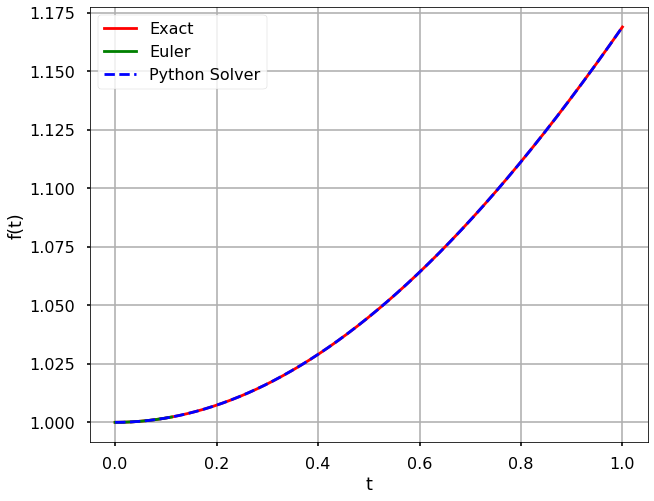

In [11]:
plt.figure(figsize = (10, 8))

# Exact solution
t = np.linspace(0, 1, 1000)
s = np.log(np.exp(s0) + (t**2-t[0])/2)
plt.plot(t, s, 'r', label='Exact')

# Forward Euler
plt.plot(t_eul, s_eul, 'g', label='Euler')

# Python solver
sol = solve_ivp(f, [0, 1], [s0], t_eval=t)
plt.plot(sol.t, sol.y[0], 'b--', label='Python Solver')

plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc=2)
plt.show()